# 🏛 Class 2: Linear Regression 🏛

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 💦 Activity: You are given the distances run (miles) & quantity of water drunk (L) by many runners

### Create a scatterplot of distance versus water consumed

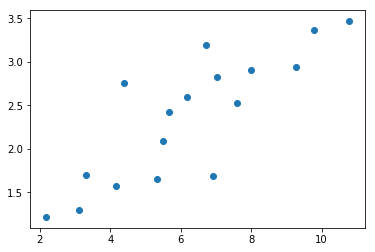

In [2]:
np.random.seed(seed=0)

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

plt.scatter(X, Y)

### Find the best line that describes this relationship.

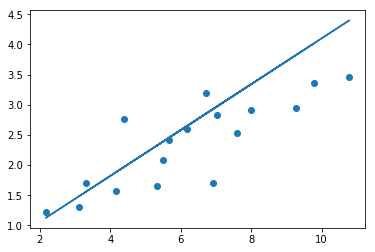

error: 0.3340064573020295


In [3]:
M = sum(Y)/sum(X)
predicted_y_values = list(map(lambda x: M*x + 0.3, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values)

error = sum([ (i-j)**2 for i, j in zip(Y, predicted_y_values) ]) / len(Y)

plt.show()
error_str = str(error)
print('error: ' + error_str)

### We HAVE a line, but it isn't perfect. Change the numbers assigned to the feature's WEIGHT<sub>importance</sub> and C.

In [4]:
#order 1, refers to polynomial
#1 = straight line, 2 = parabola, lol imsa MI flashbacks

#WE DON'T HAVE TO UNDERSTAND HOW POLYFIT WORKS. just know it DOES work
print(np.polyfit(X, Y, 1)) 

[0.25163494 0.79880123]


### BUT WAIT! There's a better way of doing ^ that with SKLEARN!

In [5]:
lr_reg = LinearRegression()

#RESHAPING: necessary to inform sklearn that there's only 1 feature
#Basically, turns an array into an array of arrays
#the other way doesn't need reshaping BUT we're going to be using sklearn
#so get in the habit of reshaping
lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))

print(lr_reg.coef_)
print(lr_reg.intercept_)
print(' ')
print('Above scores = BEST weight/slope, BEST intercept. Plug into formula:')
print(np.poly1d(np.polyfit(X, Y, 1)))
print(' ')
print('And now let us see the X-values placed in order')
print(np.unique(X))

[[0.25163494]]
[0.79880123]
 
Above scores = BEST weight/slope, BEST intercept. Plug into formula:
 
0.2516 x + 0.7988
 
And now let us see the X-values placed in order
[ 2.167  3.1    3.3    4.168  4.4    5.313  5.5    5.654  6.182  6.71
  6.93   7.042  7.59   7.997  9.27   9.779 10.791]


### DOPE. Let's see this scatterplot with its LEAST SQUARES regression line of BEST FIT!

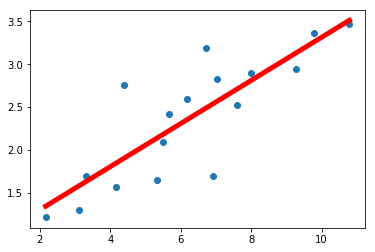

In [6]:
plt.scatter(X, Y)
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), color='red', linewidth=5)
plt.show()

# 📺 Activity: Companies paid for TV, radio, newspaper advertising. Find out the impact of their advertising on their sales

In [7]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

advert_data = pd.read_csv('Advertising.csv')
feature_cols = ['TV', 'radio', 'newspaper']
ads = advert_data[feature_cols]
gross = advert_data.sales

#Follow sklearn's pattern: import, instantiate, fit
lm = LinearRegression()
lm.fit(ads, gross)

intercept = str(lm.intercept_)
coefficient = str(lm.coef_)

#print intercept and coefficients
print('intercept: ' + intercept)
print('coefficients: ' + coefficient)
print(' ')
print('Prediction if a hypothetical company were to spend $100 on TV, $25 on radio, and $25 on newspaper:')
print(lm.predict([[100, 25, 25]]))
print('Wow those are horrible sales. Hey hypothetical company, maybe spend more on advertising')

intercept: 2.9388893694594067
coefficients: [ 0.04576465  0.18853002 -0.00103749]
 
Prediction if a hypothetical company were to spend $100 on TV, $25 on radio, and $25 on newspaper:
[12.20266701]
Wow those are horrible sales. Hey hypothetical company, maybe spend more on advertising


### BUT WAIT! There's a BETTER way to get the coefficients!

In [8]:
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data=advert_data).fit()

print('Coefficients: ')
lm.params

Coefficients: 


Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

### Compute the R-squared

In [9]:
#compares y test to x test
# print(lr_reg.core(X.reshape(-1, 1), Y.reshape(-1, 1)))
# 'LinearRegression' object has no attribute 'core'

#compares prediction to the true value
print(r2_score(Y.reshape(-1, 1), lr_reg.predict(X.reshape(-1, 1))))

0.6928760302783603


# 💯 Here's the Milad-vetted, well-commented way:

In [10]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

df = pd.read_csv('Advertising.csv')
features = ['TV', 'radio', 'newspaper']

#Use the top 150 companies to TRAIN the LinReg model
#Use the last 150 companies to TEST the LinReg model

#STEP 1: Divide data between train and test parts
X_train = df[features][:150]
Y_train = df.sales[:150]

#STEP 2: Obtain best linear representation from trained part of data
sales_reg = LinearRegression() #Instantiate sklearn's LinReg class
sales_reg.fit(X_train, Y_train) #Call fit method to the class
#Now the model's learned the weights and intercept!

print('Coefficients (weights) & y-intercepts of first 150 sales (training data):')
print(sales_reg.coef_)
print(sales_reg.intercept_)
print('')

#STEP 3: Evaluate model-based mean square and R squared for TEST data
X_test = df[features][-50:]
Y_test = df.sales[-50:]

print('Predicted sales of last 150 sales:')
print(sales_reg.predict(X_test))
print('')

print('Coefficients (weights) & y-intercepts of last 150 sales (test data):')
print(sales_reg.score(X_test, Y_test))
print(r2_score(Y_test, sales_reg.predict(X_test)))

Coefficients (weights) & y-intercepts of first 150 sales (training data):
[ 0.04700012  0.17993257 -0.00140273]
3.029766796293684

Predicted sales of last 150 sales:
[18.67186188 10.15990172 16.48950045 18.17132726 15.63964047  5.30168953
 15.19930681 10.27021058 10.15577653 12.48190724 14.35100299 13.43010832
 15.10545883 17.32542469 11.17561481 14.54411372 10.60623457 13.6578278
 17.31920373 18.29020846  7.44118029 14.4553876   7.54376735 12.20415315
 14.07598825 24.7841683  20.11008458 12.38328494 16.41529992 12.58762415
 10.84616747 14.23249384  6.65512798 24.18338541 18.74887883 20.75225663
  9.92682913 17.15002463 18.96767352  6.05302918 12.27336433  8.51313117
  4.53156602 18.42150484 16.46286778  5.47156415  8.32748549 13.01318332
 23.82330766 15.4737108 ]

Coefficients (weights) & y-intercepts of last 150 sales (test data):
0.8963519785440214
0.8963519785440215


# So we have <span style="color: purple">2 ways</span> to evaluate linear regression models:
### <span style="color: red">Mean Square Error</span> 1/N * sum(Ytrue - Yprediction)^2
### <span style="color: red">R^2 Score</span> 0 <= N <= 1
* <font size="+1">Close to 1 = better model</font>
* <font size="+1">Measures **goodness of fit** but **does not** validate the model</font>

In [13]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6
